In [21]:
import matplotlib.pyplot as plt
import networkx as nx

plt.rcParams['font.family'] = 'Malgun Gothic'

In [23]:
lines = {
    1: "소요산 - 동두천 - 보산 - 동두천중앙 - 지행 - 덕정 - 덕계 - 양주 - 녹양 - 가능 - 의정부 - 회룡 - 망월사 - 도봉산 - 도봉 - 방학 - 창동 - 녹천 - 월계 - 성북 - 석계 - 신이문 - 외대앞 - 회기 - 청량리 - 제기동 - 신설동 - 동묘앞 - 동대문 - 종로5가 - 종로3가 - 종각 - 시청 - 서울역 - 남영 - 용산 - 노량진 - 대방 - 신길 - 영등포 - 신도림 - 구로 - 구일 - 개봉 - 오류동 - 온수 - 역곡 - 소사 - 부천 - 중동 - 송내 - 부개 - 부평 - 백운 - 동암 - 간석 - 주안 - 도화 - 제물포 - 도원 - 동인천 - 인천 - 광명 - 가산디지털단지 - 독산 - 금천구청 - 석수 - 관악 - 안양 - 명학 - 금정 - 군포 - 당정 - 의왕 - 성균관대 - 화서 - 수원 - 세류 - 병점 - 세마 - 오산대 - 오산 - 진위 - 송탄 - 서정리 - 지제 - 평택 - 성환 - 직산 - 두정 - 천안 - 봉명 - 쌍용 - 아산 - 배방 - 온양온천 - 신창 - 서동탄",
    2: "시청 - 을지로입구 - 을지로3가 - 을지로4가 - 동대문역사문화공원 - 신당 - 상왕십리 - 왕십리 - 한양대 - 뚝섬 - 성수 - 건대입구 - 구의 - 강변 - 잠실나루 - 잠실 - 신천 - 종합운동장 - 삼성 - 선릉 - 역삼 - 강남 - 교대 - 서초 - 방배 - 사당 - 낙성대 - 서울대입구 - 봉천 - 신림 - 신대방 - 구로디지털단지 - 대림 - 신도림 - 문래 - 영등포구청 - 당산 - 합정 - 홍대입구 - 신촌 - 이대 - 아현 - 충정로 - 시청",
    3: "대화 - 주엽 - 정발산 - 마두 - 백석 - 대곡 - 화정 - 원당 - 삼송 - 지축 - 구파발 - 연신내 - 불광 - 녹번 - 홍제 - 무악재 - 독립문 - 경복궁 - 안국 - 종로3가 - 을지로3가 - 충무로 - 동대입구 - 약수 - 금호 - 옥수 - 압구정 - 신사 - 잠원 - 고속터미널 - 교대 - 남부터미널 - 양재 - 매봉 - 도곡 - 대치 - 학여울 - 대청 - 일원 - 수서 - 가락시장 - 경찰병원 - 오금",
    4: "진접 - 오남 - 별내별가람 - 당고개 - 상계 - 노원 - 창동 - 쌍문 - 수유 - 미아 - 미아삼거리 - 길음 - 성신여대입구 - 한성대입구 - 혜화 - 동대문 - 동대문역사문화공원 - 충무로 - 명동 - 회현 - 서울역 - 숙대입구 - 삼각지 - 신용산 - 이촌 - 동작 - 이수 - 사당 - 남태령 - 선바위 - 경마공원 - 대공원 - 과천 - 정부과천청사 - 인덕원 - 평촌 - 범계 - 금정 - 산본 - 수리산 - 대야미 - 반월 - 상록수 - 한대앞 - 중앙 - 고잔 - 공단 - 안산 - 신길온천 - 정왕 - 오이도",
    5: "방화 - 개화산 - 김포공항 - 송정 - 마곡 - 발산 - 우장산 - 화곡 - 까치산 - 신정 - 목동 - 오목교 - 양평 - 영등포구청 - 영등포시장 - 신길 - 여의도 - 여의나루 - 마포 - 공덕 - 애오개 - 충정로 - 서대문 - 광화문 - 종로3가 - 을지로4가 - 동대문역사문화공원 - 청구 - 신금호 - 행당 - 왕십리 - 마장 - 답십리 - 장한평 - 군자 - 아차산 - 광나루 - 천호 - 강동 - 길동 - 굽은다리 - 명일 - 고덕 - 상일동 - 둔촌동 - 올림픽공원 - 방이 - 오금 - 개롱 - 거여 - 마천"
}

line_colors = {
    1: 'blue',
    2: 'green',
    3: 'orange',
    4: 'red',
    5: 'purple'
}

G = nx.Graph()

In [25]:
edges_by_line = {line: [] for line in lines}
station_lines = {}

for line, station_str in lines.items():
    station_list = [s.strip() for s in station_str.split('-')]
    for station in station_list:
        station_lines.setdefault(station, set()).add(line)
    for i in range(len(station_list)-1):
        G.add_edge(station_list[i], station_list[i+1], line=line)
        edges_by_line[line].append((station_list[i], station_list[i+1]))

transfer_stations = {station for station, line_set in station_lines.items() if len(line_set)>1}

In [27]:
pos = nx.kamada_kawai_layout(G)

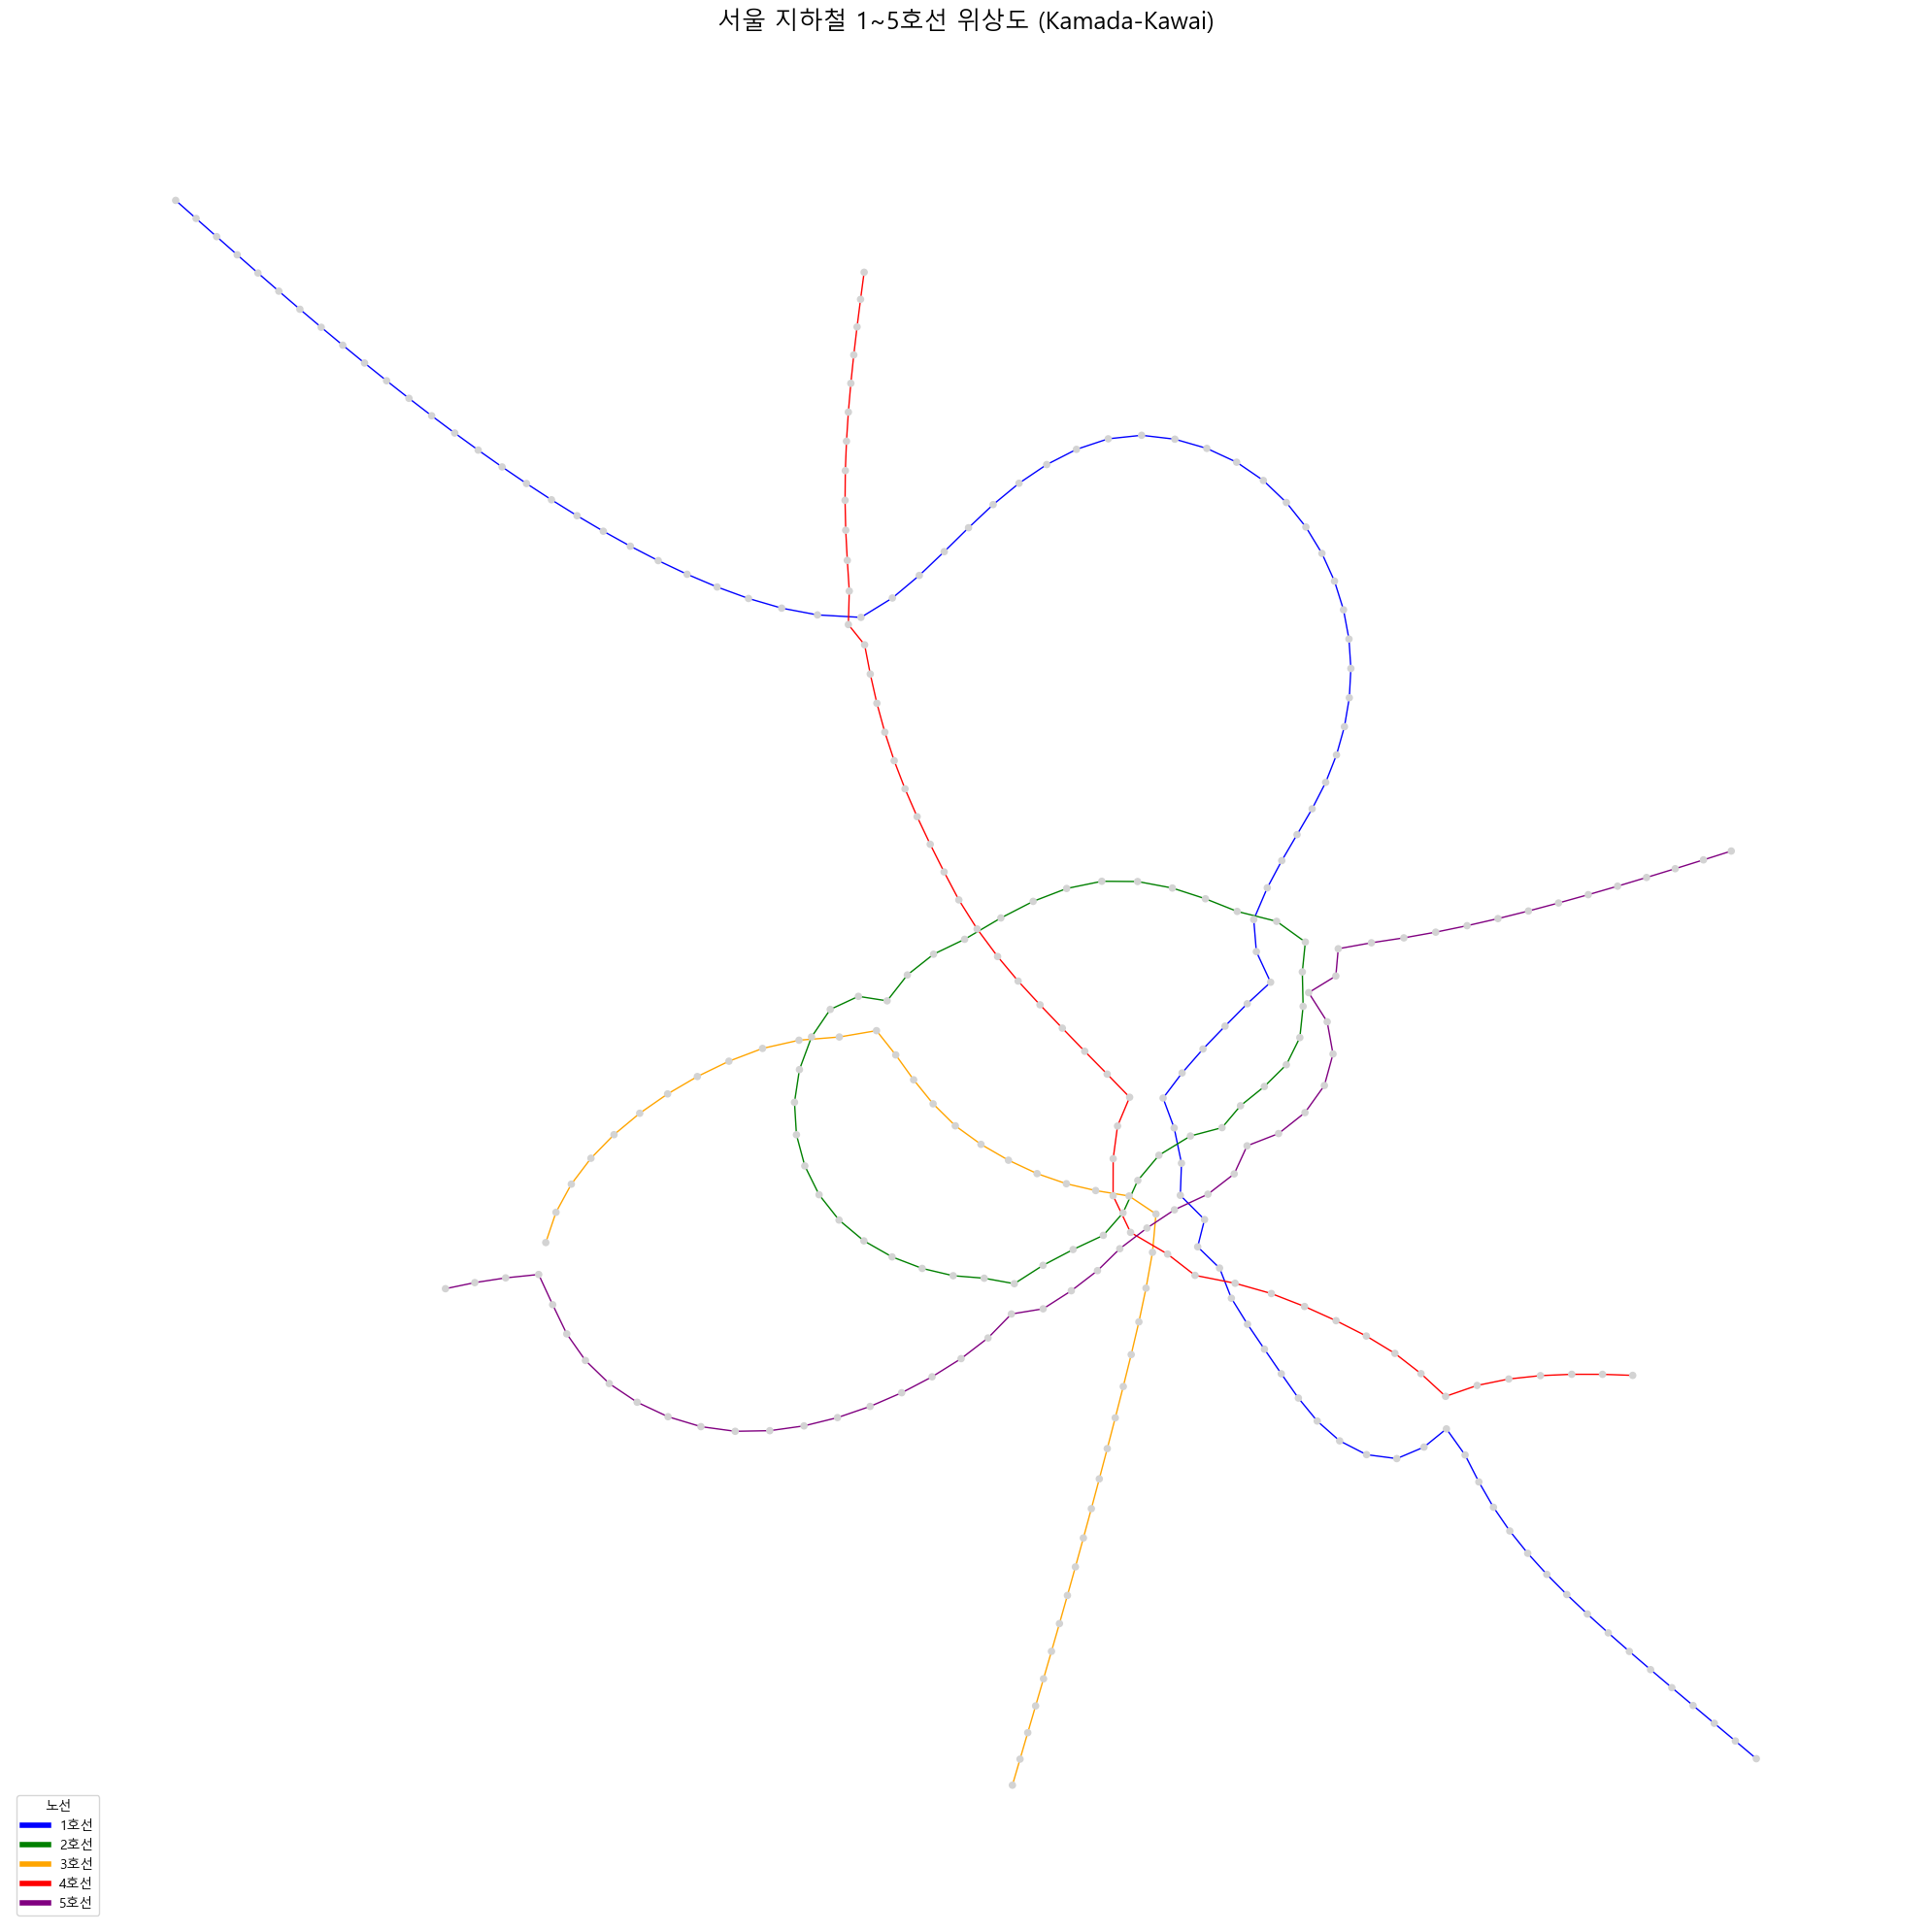

In [41]:
plt.figure(figsize=(20,20))

for line, edges in edges_by_line.items():
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color = line_colors[line])
node_colors = ['gold' if node in transfer_stations else 'lightgray' for node in G.nodes()]
node_sizes = [100 if node in transfer_stations else 20 for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)

# nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes()}, font_size=8, font_family='Malgun Gothic')
labels={node: node for node in transfer_stations if node in pos}

for line in range(1, 6):
    plt.plot([], [], color=line_colors[line], label=f"{line}호선", linewidth=4)
plt.legend(title="노선", loc="lower left", fontsize=10)

plt.title("서울 지하철 1~5호선 위상도 (Kamada-Kawai)", fontsize=18)
plt.axis("off")
plt.tight_layout()
plt.show()

In [45]:
len(G.edges), len(G.nodes)

(305, 286)

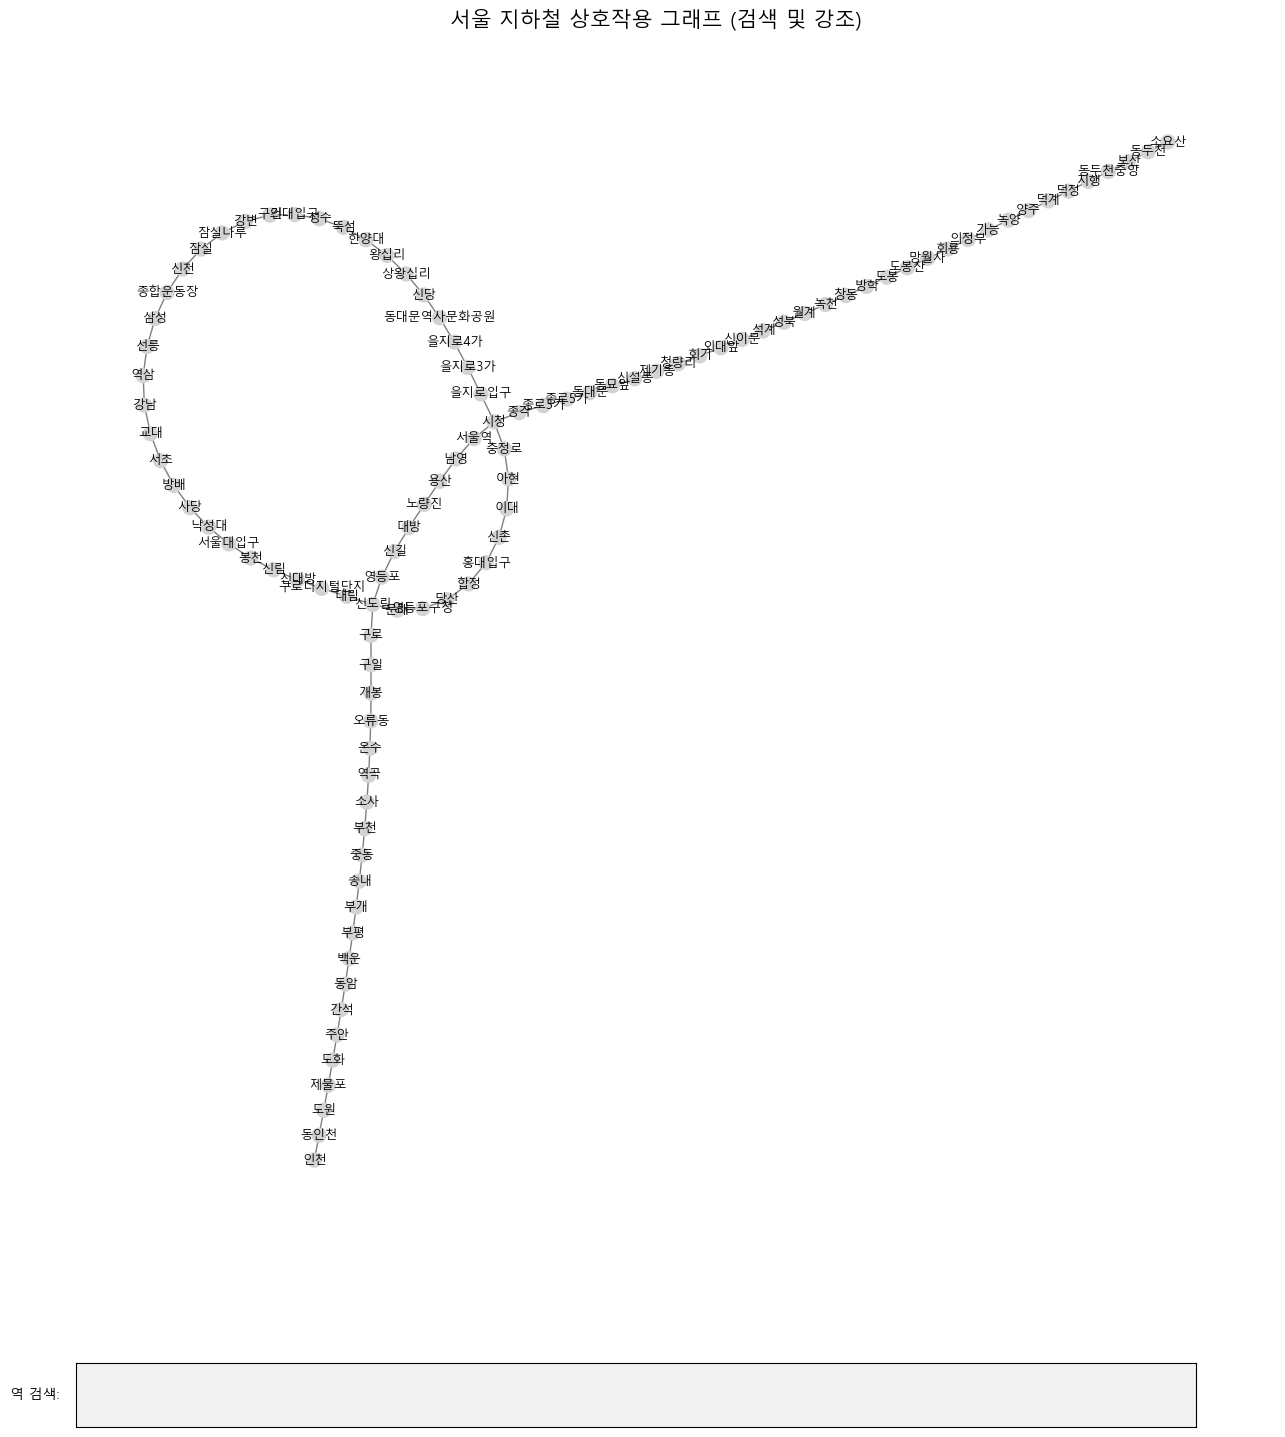

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.widgets import TextBox

# 폰트 설정
rcParams['font.family'] = 'Malgun Gothic'

# --- 그래프 생성 함수 ---
def build_subway_graph():
    G = nx.Graph()
    lines = {
        1: "소요산 - 동두천 - 보산 - 동두천중앙 - 지행 - 덕정 - 덕계 - 양주 - 녹양 - 가능 - 의정부 - 회룡 - 망월사 - 도봉산 - 도봉 - 방학 - 창동 - 녹천 - 월계 - 성북 - 석계 - 신이문 - 외대앞 - 회기 - 청량리 - 제기동 - 신설동 - 동묘앞 - 동대문 - 종로5가 - 종로3가 - 종각 - 시청 - 서울역 - 남영 - 용산 - 노량진 - 대방 - 신길 - 영등포 - 신도림 - 구로 - 구일 - 개봉 - 오류동 - 온수 - 역곡 - 소사 - 부천 - 중동 - 송내 - 부개 - 부평 - 백운 - 동암 - 간석 - 주안 - 도화 - 제물포 - 도원 - 동인천 - 인천",
        2: "시청 - 을지로입구 - 을지로3가 - 을지로4가 - 동대문역사문화공원 - 신당 - 상왕십리 - 왕십리 - 한양대 - 뚝섬 - 성수 - 건대입구 - 구의 - 강변 - 잠실나루 - 잠실 - 신천 - 종합운동장 - 삼성 - 선릉 - 역삼 - 강남 - 교대 - 서초 - 방배 - 사당 - 낙성대 - 서울대입구 - 봉천 - 신림 - 신대방 - 구로디지털단지 - 대림 - 신도림 - 문래 - 영등포구청 - 당산 - 합정 - 홍대입구 - 신촌 - 이대 - 아현 - 충정로 - 시청"
    }
    for line, stations in lines.items():
        station_list = [s.strip() for s in stations.split("-")]
        for i in range(len(station_list) - 1):
            G.add_edge(station_list[i], station_list[i + 1], line=line)
    return G

# --- 시각화 함수 ---
def draw_interactive_graph(G, highlight_node=None):
    pos = nx.kamada_kawai_layout(G)
    fig, ax = plt.subplots(figsize=(16, 16))
    ax.clear()

    # draw edges
    nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.5)

    # node color
    node_colors = []
    node_sizes = []
    for node in G.nodes():
        if node == highlight_node:
            node_colors.append("gold")
            node_sizes.append(400)
        else:
            node_colors.append("lightgray")
            node_sizes.append(100)

    # draw nodes
    nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, ax=ax)
    labels = nx.draw_networkx_labels(G, pos, font_size=9, font_family='Malgun Gothic', ax=ax)

    ax.set_title("서울 지하철 상호작용 그래프 (검색 및 강조)", fontsize=15)
    ax.axis("off")

    # interactivity
    def on_hover(event):
        if event.inaxes == ax:
            for node, (x, y) in pos.items():
                if (event.xdata - x)**2 + (event.ydata - y)**2 < 0.01:
                    draw_interactive_graph(G, highlight_node=node)
                    break

    def on_submit(text):
        draw_interactive_graph(G, highlight_node=text.strip())

    # add search box
    axbox = plt.axes([0.15, 0.01, 0.7, 0.04])
    text_box = TextBox(axbox, "역 검색: ")
    text_box.on_submit(on_submit)

    fig.canvas.mpl_connect("motion_notify_event", on_hover)
    plt.show()

# --- 실행 ---
subway_graph = build_subway_graph()
draw_interactive_graph(subway_graph)


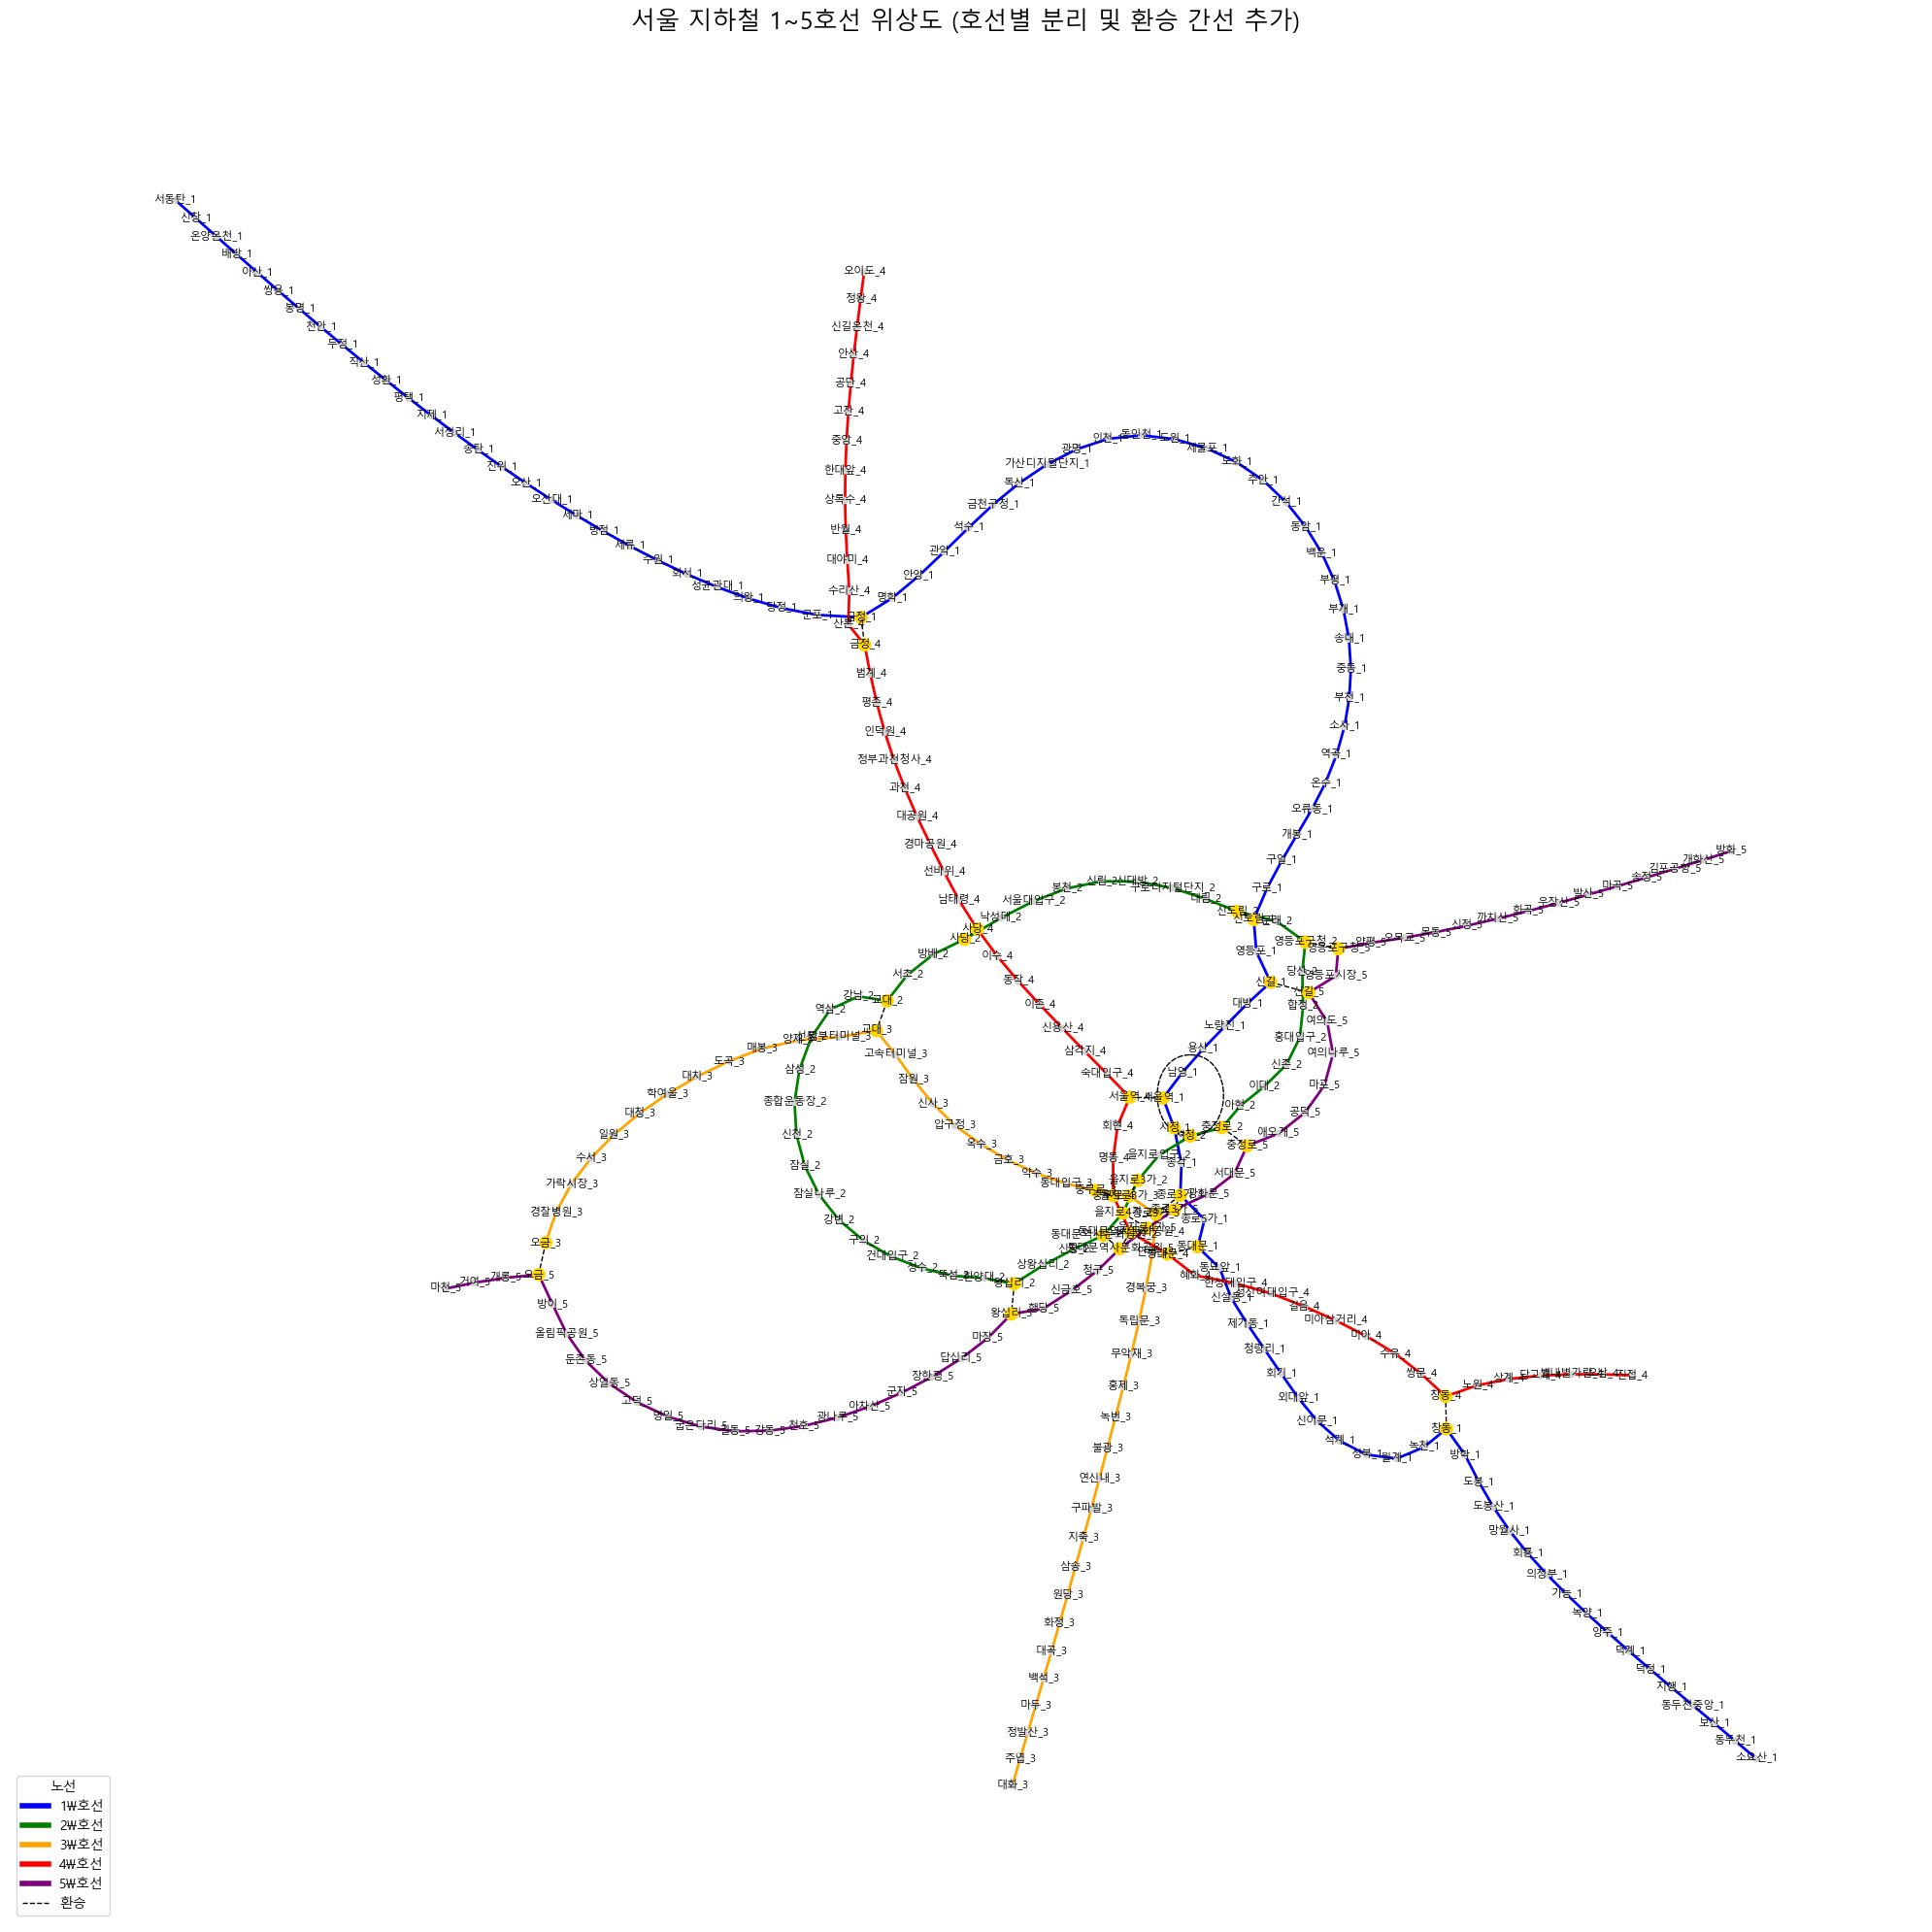

In [31]:
import matplotlib.pyplot as plt
import networkx as nx

plt.rcParams['font.family'] = 'Malgun Gothic'

lines = {
    1: "소요산 - 동두천 - 보산 - 동두천중앙 - 지행 - 덕정 - 덕계 - 양주 - 녹양 - 가능 - 의정부 - 회룡 - 망월사 - 도봉산 - 도봉 - 방학 - 창동 - 녹천 - 월계 - 성북 - 석계 - 신이문 - 외대앞 - 회기 - 청량리 - 제기동 - 신설동 - 동묘앞 - 동대문 - 종로5가 - 종로3가 - 종각 - 시청 - 서울역 - 남영 - 용산 - 노량진 - 대방 - 신길 - 영등포 - 신도림 - 구로 - 구일 - 개봉 - 오류동 - 온수 - 역곡 - 소사 - 부천 - 중동 - 송내 - 부개 - 부평 - 백운 - 동암 - 간석 - 주안 - 도화 - 제물포 - 도원 - 동인천 - 인천 - 광명 - 가산디지털단지 - 독산 - 금천구청 - 석수 - 관악 - 안양 - 명학 - 금정 - 군포 - 당정 - 의왕 - 성균관대 - 화서 - 수원 - 세류 - 병점 - 세마 - 오산대 - 오산 - 진위 - 송탄 - 서정리 - 지제 - 평택 - 성환 - 직산 - 두정 - 천안 - 봉명 - 쌍용 - 아산 - 배방 - 온양온천 - 신창 - 서동탄",
    2: "시청 - 을지로입구 - 을지로3가 - 을지로4가 - 동대문역사문화공원 - 신당 - 상왕십리 - 왕십리 - 한양대 - 뚝섬 - 성수 - 건대입구 - 구의 - 강변 - 잠실나루 - 잠실 - 신천 - 종합운동장 - 삼성 - 선릉 - 역삼 - 강남 - 교대 - 서초 - 방배 - 사당 - 낙성대 - 서울대입구 - 봉천 - 신림 - 신대방 - 구로디지털단지 - 대림 - 신도림 - 문래 - 영등포구청 - 당산 - 합정 - 홍대입구 - 신촌 - 이대 - 아현 - 충정로 - 시청",
    3: "대화 - 주엽 - 정발산 - 마두 - 백석 - 대곡 - 화정 - 원당 - 삼송 - 지축 - 구파발 - 연신내 - 불광 - 녹번 - 홍제 - 무악재 - 독립문 - 경복궁 - 안국 - 종로3가 - 을지로3가 - 충무로 - 동대입구 - 약수 - 금호 - 옥수 - 압구정 - 신사 - 잠원 - 고속터미널 - 교대 - 남부터미널 - 양재 - 매봉 - 도곡 - 대치 - 학여울 - 대청 - 일원 - 수서 - 가락시장 - 경찰병원 - 오금",
    4: "진접 - 오남 - 별내별가람 - 당고개 - 상계 - 노원 - 창동 - 쌍문 - 수유 - 미아 - 미아삼거리 - 길음 - 성신여대입구 - 한성대입구 - 혜화 - 동대문 - 동대문역사문화공원 - 충무로 - 명동 - 회현 - 서울역 - 숙대입구 - 삼각지 - 신용산 - 이촌 - 동작 - 이수 - 사당 - 남태령 - 선바위 - 경마공원 - 대공원 - 과천 - 정부과천청사 - 인덕원 - 평촌 - 범계 - 금정 - 산본 - 수리산 - 대야미 - 반월 - 상록수 - 한대앞 - 중앙 - 고잔 - 공단 - 안산 - 신길온천 - 정왕 - 오이도",
    5: "방화 - 개화산 - 김포공항 - 송정 - 마곡 - 발산 - 우장산 - 화곡 - 까치산 - 신정 - 목동 - 오목교 - 양평 - 영등포구청 - 영등포시장 - 신길 - 여의도 - 여의나루 - 마포 - 공덕 - 애오개 - 충정로 - 서대문 - 광화문 - 종로3가 - 을지로4가 - 동대문역사문화공원 - 청구 - 신금호 - 행당 - 왕십리 - 마장 - 답십리 - 장한평 - 군자 - 아차산 - 광나루 - 천호 - 강동 - 길동 - 굽은다리 - 명일 - 고덕 - 상일동 - 둔촌동 - 올림픽공원 - 방이 - 오금 - 개롱 - 거여 - 마천"
}

line_colors = {
    1: 'blue',
    2: 'green',
    3: 'orange',
    4: 'red',
    5: 'purple'
}

G = nx.Graph()
edges_by_line = {line: [] for line in lines}

# station_nodes: 기본 역명과 관련된 (역명_호선) 리스트 저장
station_nodes = {}

# 각 호선 별로 (역명_호선) 형태의 노드를 생성하고 연속역 간 간선 추가
for line, station_str in lines.items():
    station_list = [s.strip() for s in station_str.split('-')]
    # 각 역을 개별 노드로 생성
    nodes = [f"{station}_{line}" for station in station_list]
    for station, node in zip(station_list, nodes):
        station_nodes.setdefault(station, []).append(node)
    for i in range(len(nodes)-1):
        G.add_edge(nodes[i], nodes[i+1], weight=2, line=line)
        edges_by_line[line].append((nodes[i], nodes[i+1]))

# 동일 역명의 서로 다른 호선들 사이에 환승 간선 추가 (가중치 2)
transfer_edges = []
for station, node_list in station_nodes.items():
    if len(node_list) > 1:
        for i in range(len(node_list)):
            for j in range(i+1, len(node_list)):
                G.add_edge(node_list[i], node_list[j], weight=2, transfer=True)
                transfer_edges.append((node_list[i], node_list[j]))

pos = nx.kamada_kawai_layout(G)

plt.figure(figsize=(20,20))

# 각 호선의 간선 그리기
for line, edges in edges_by_line.items():
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=line_colors[line], width=2)

# 환승 간선은 검은색 점선으로 그리기
nx.draw_networkx_edges(G, pos, edgelist=transfer_edges, edge_color='black', style='dashed', width=1)

# 노드 색상: 환승 노드는 gold, 일반 노드는 lightgray
transfer_nodes = {node for nodes in station_nodes.values() if len(nodes) > 1 for node in nodes}
node_colors = ['gold' if node in transfer_nodes else 'lightgray' for node in G.nodes()]
node_sizes = [80 if node in transfer_nodes else 20 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)

# 노드 라벨은 원래 역명과 호선 번호를 표시
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_family='Malgun Gothic')

# 범례 추가
for line in range(1, 6):
    plt.plot([], [], color=line_colors[line], label=f"{line}\\호선", linewidth=4)
plt.plot([], [], color='black', linestyle='dashed', label="환승", linewidth=1)
plt.legend(title="노선", loc="lower left", fontsize=10)

plt.title("서울 지하철 1~5호선 위상도 (호선별 분리 및 환승 간선 추가)", fontsize=18)
plt.axis("off")
plt.tight_layout()
plt.show()

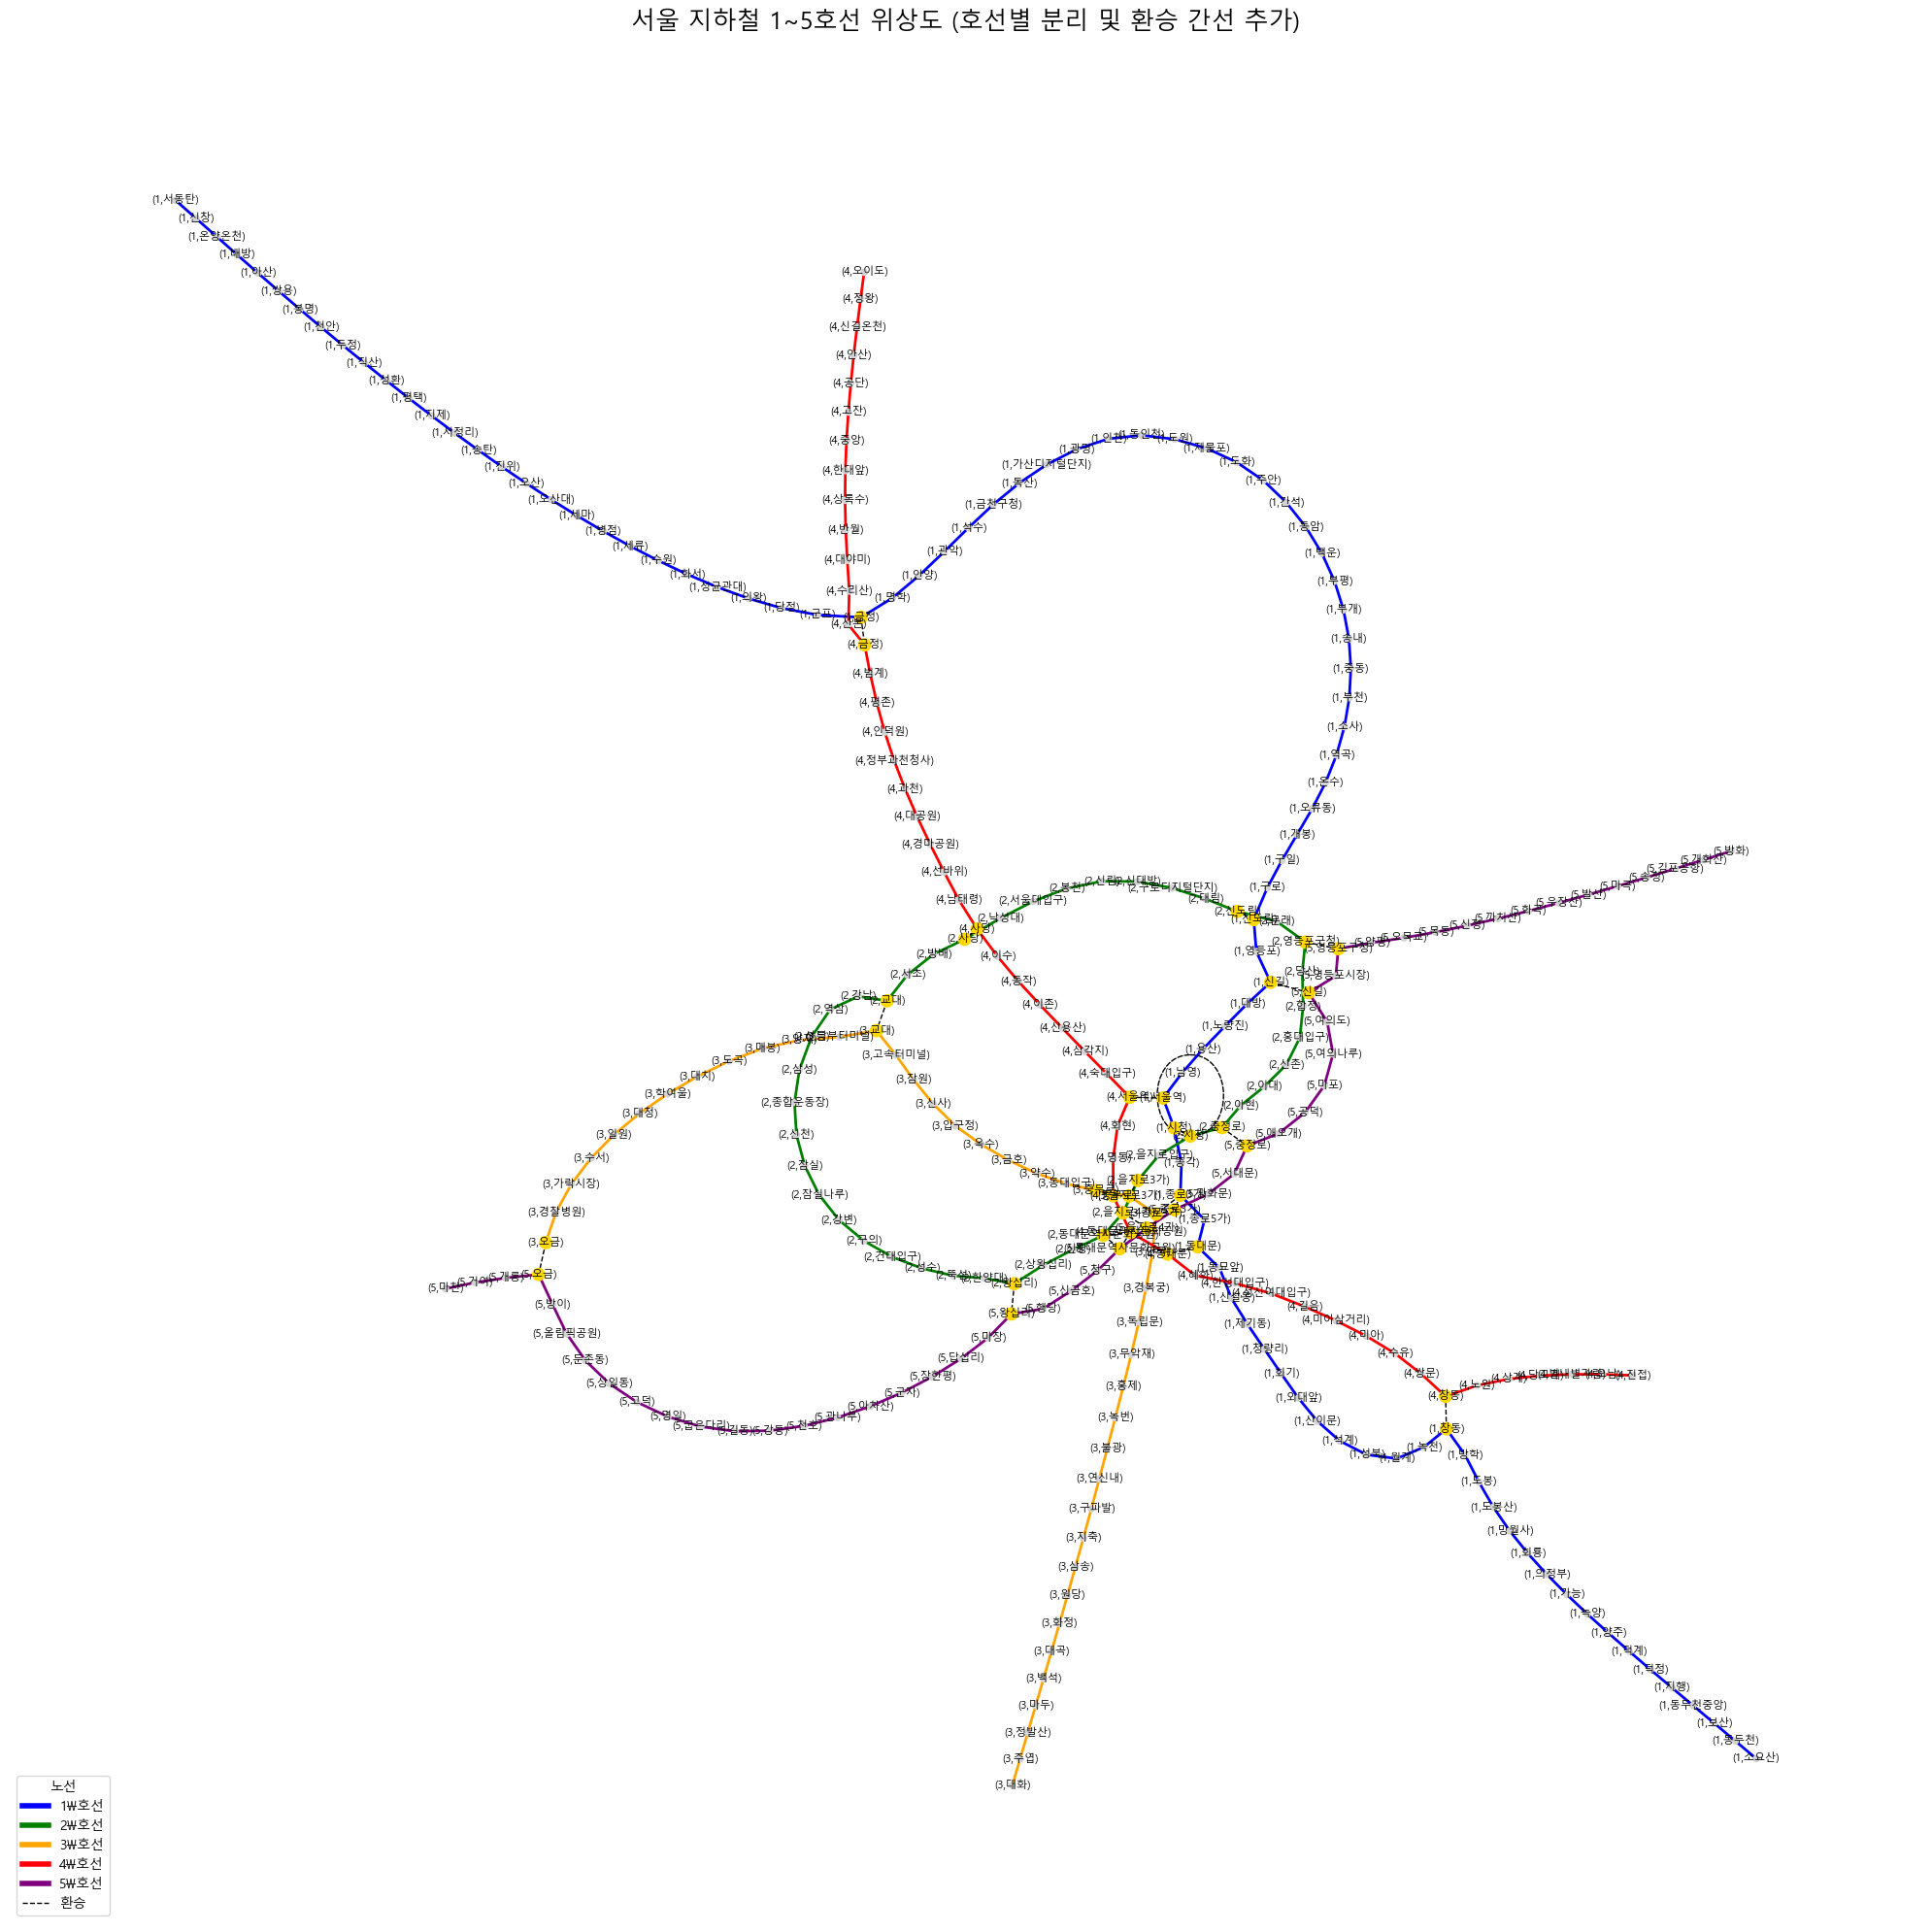

In [50]:
import matplotlib.pyplot as plt
import networkx as nx

plt.rcParams['font.family'] = 'Malgun Gothic'

lines = {
    1: "소요산 - 동두천 - 보산 - 동두천중앙 - 지행 - 덕정 - 덕계 - 양주 - 녹양 - 가능 - 의정부 - 회룡 - 망월사 - 도봉산 - 도봉 - 방학 - 창동 - 녹천 - 월계 - 성북 - 석계 - 신이문 - 외대앞 - 회기 - 청량리 - 제기동 - 신설동 - 동묘앞 - 동대문 - 종로5가 - 종로3가 - 종각 - 시청 - 서울역 - 남영 - 용산 - 노량진 - 대방 - 신길 - 영등포 - 신도림 - 구로 - 구일 - 개봉 - 오류동 - 온수 - 역곡 - 소사 - 부천 - 중동 - 송내 - 부개 - 부평 - 백운 - 동암 - 간석 - 주안 - 도화 - 제물포 - 도원 - 동인천 - 인천 - 광명 - 가산디지털단지 - 독산 - 금천구청 - 석수 - 관악 - 안양 - 명학 - 금정 - 군포 - 당정 - 의왕 - 성균관대 - 화서 - 수원 - 세류 - 병점 - 세마 - 오산대 - 오산 - 진위 - 송탄 - 서정리 - 지제 - 평택 - 성환 - 직산 - 두정 - 천안 - 봉명 - 쌍용 - 아산 - 배방 - 온양온천 - 신창 - 서동탄",
    2: "시청 - 을지로입구 - 을지로3가 - 을지로4가 - 동대문역사문화공원 - 신당 - 상왕십리 - 왕십리 - 한양대 - 뚝섬 - 성수 - 건대입구 - 구의 - 강변 - 잠실나루 - 잠실 - 신천 - 종합운동장 - 삼성 - 선릉 - 역삼 - 강남 - 교대 - 서초 - 방배 - 사당 - 낙성대 - 서울대입구 - 봉천 - 신림 - 신대방 - 구로디지털단지 - 대림 - 신도림 - 문래 - 영등포구청 - 당산 - 합정 - 홍대입구 - 신촌 - 이대 - 아현 - 충정로 - 시청",
    3: "대화 - 주엽 - 정발산 - 마두 - 백석 - 대곡 - 화정 - 원당 - 삼송 - 지축 - 구파발 - 연신내 - 불광 - 녹번 - 홍제 - 무악재 - 독립문 - 경복궁 - 안국 - 종로3가 - 을지로3가 - 충무로 - 동대입구 - 약수 - 금호 - 옥수 - 압구정 - 신사 - 잠원 - 고속터미널 - 교대 - 남부터미널 - 양재 - 매봉 - 도곡 - 대치 - 학여울 - 대청 - 일원 - 수서 - 가락시장 - 경찰병원 - 오금",
    4: "진접 - 오남 - 별내별가람 - 당고개 - 상계 - 노원 - 창동 - 쌍문 - 수유 - 미아 - 미아삼거리 - 길음 - 성신여대입구 - 한성대입구 - 혜화 - 동대문 - 동대문역사문화공원 - 충무로 - 명동 - 회현 - 서울역 - 숙대입구 - 삼각지 - 신용산 - 이촌 - 동작 - 이수 - 사당 - 남태령 - 선바위 - 경마공원 - 대공원 - 과천 - 정부과천청사 - 인덕원 - 평촌 - 범계 - 금정 - 산본 - 수리산 - 대야미 - 반월 - 상록수 - 한대앞 - 중앙 - 고잔 - 공단 - 안산 - 신길온천 - 정왕 - 오이도",
    5: "방화 - 개화산 - 김포공항 - 송정 - 마곡 - 발산 - 우장산 - 화곡 - 까치산 - 신정 - 목동 - 오목교 - 양평 - 영등포구청 - 영등포시장 - 신길 - 여의도 - 여의나루 - 마포 - 공덕 - 애오개 - 충정로 - 서대문 - 광화문 - 종로3가 - 을지로4가 - 동대문역사문화공원 - 청구 - 신금호 - 행당 - 왕십리 - 마장 - 답십리 - 장한평 - 군자 - 아차산 - 광나루 - 천호 - 강동 - 길동 - 굽은다리 - 명일 - 고덕 - 상일동 - 둔촌동 - 올림픽공원 - 방이 - 오금 - 개롱 - 거여 - 마천"
}

line_colors = {
    1: 'blue',
    2: 'green',
    3: 'orange',
    4: 'red',
    5: 'purple'
}

G = nx.Graph()
edges_by_line = {line: [] for line in lines}

# station_nodes: 기본 역명과 관련된 (역명_호선) 리스트 저장
station_nodes = {}

# 각 호선 별로 (역명, 호선) 형태의 노드를 생성하고 연속역 간 간선 추가
for line, station_str in lines.items():
    station_list = [s.strip() for s in station_str.split('-')]
    # 각 역을 개별 노드로 생성
    nodes = [f"({line},{station})" for station in station_list]
    for station, node in zip(station_list, nodes):
        station_nodes.setdefault(station, []).append(node)
    for i in range(len(nodes)-1):
        G.add_edge(nodes[i], nodes[i+1], weight=2, line=line)
        edges_by_line[line].append((nodes[i], nodes[i+1]))

# 동일 역명의 서로 다른 호선들 사이에 환승 간선 추가 (가중치 2)
transfer_edges = []
for station, node_list in station_nodes.items():
    if len(node_list) > 1:
        for i in range(len(node_list)):
            for j in range(i+1, len(node_list)):
                G.add_edge(node_list[i], node_list[j], weight=2, transfer=True)
                transfer_edges.append((node_list[i], node_list[j]))

pos = nx.kamada_kawai_layout(G)

plt.figure(figsize=(20,20))

# 각 호선의 간선 그리기
for line, edges in edges_by_line.items():
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=line_colors[line], width=2)

# 환승 간선은 검은색 점선으로 그리기
nx.draw_networkx_edges(G, pos, edgelist=transfer_edges, edge_color='black', style='dashed', width=1)

# 노드 색상: 환승 노드는 gold, 일반 노드는 lightgray
transfer_nodes = {node for nodes in station_nodes.values() if len(nodes) > 1 for node in nodes}
node_colors = ['gold' if node in transfer_nodes else 'lightgray' for node in G.nodes()]
node_sizes = [80 if node in transfer_nodes else 20 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)

# 노드 라벨은 원래 역명과 호선 번호를 표시
labels = {node: node for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8, font_family='Malgun Gothic')

# 범례 추가
for line in range(1, 6):
    plt.plot([], [], color=line_colors[line], label=f"{line}\\호선", linewidth=4)
plt.plot([], [], color='black', linestyle='dashed', label="환승", linewidth=1)
plt.legend(title="노선", loc="lower left", fontsize=10)

plt.title("서울 지하철 1~5호선 위상도 (호선별 분리 및 환승 간선 추가)", fontsize=18)
plt.axis("off")
plt.tight_layout()
plt.show()

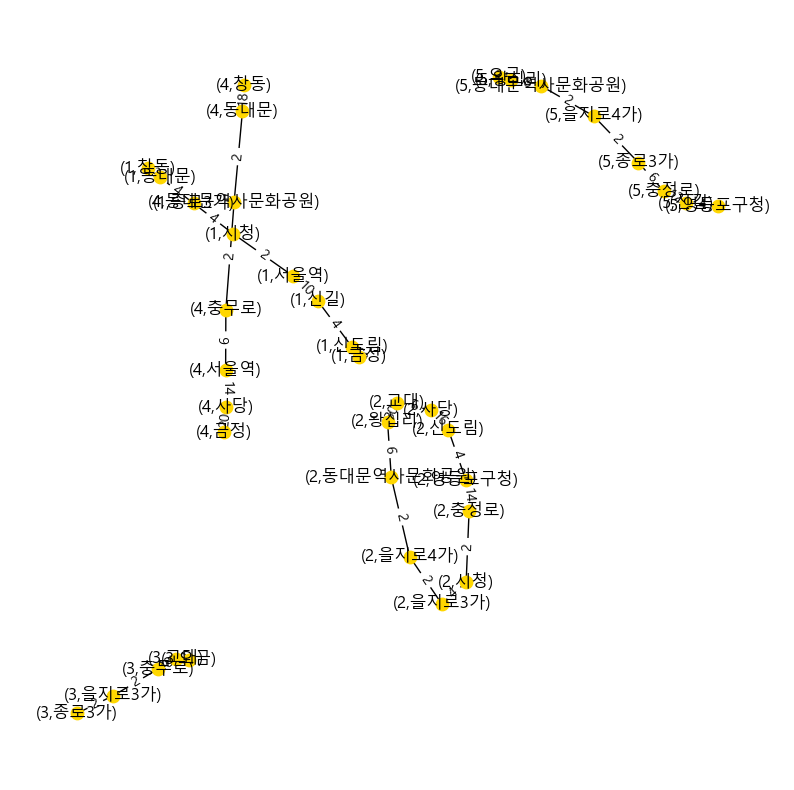

In [52]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

# 서브그래프 생성: 환승역 노드·간선만
G_t = nx.Graph()

# 각 호선별 환승역 인덱스 수집
line_station_idx = defaultdict(list)
for line, station_str in lines.items():
    station_list = [s.strip() for s in station_str.split('-')]
    for idx, station in enumerate(station_list):
        if station in station_nodes and len(station_nodes[station]) > 1:
            line_station_idx[line].append((idx, station))

# 인접 환승역끼리 가중치 계산하여 간선 추가
for line, items in line_station_idx.items():
    items.sort()  # 인덱스 순 정렬
    for (i1, s1), (i2, s2) in zip(items, items[1:]):
        weight = 2 * (i2 - i1)  # 2*(n+1) 이때 n = i2-i1-1 => 2*(n+1)=2*(i2-i1)
        u = f"({line},{s1})"
        v = f"({line},{s2})"
        G_t.add_edge(u, v, weight=weight)

# 환승역 노드 추가
for line, items in line_station_idx.items():
    for _, station in items:
        G_t.add_node(f"({line},{station})")

# 레이아웃 설정
pos = nx.spring_layout(G_t)

plt.figure(figsize=(10,10))

# 노드: 금색(gold), 크기 80
nx.draw_networkx_nodes(G_t, pos, node_color='gold', node_size=80)

# 간선: 검정 실선
nx.draw_networkx_edges(G_t, pos, edge_color='black', style='solid')

# 노드 라벨: (호선,역명)
nx.draw_networkx_labels(G_t, pos, labels={n: n for n in G_t.nodes()}, font_family='Malgun Gothic')

# 간선 가중치 라벨
edge_labels = nx.get_edge_attributes(G_t, 'weight')
nx.draw_networkx_edge_labels(G_t, pos, edge_labels, font_family='Malgun Gothic')

plt.axis('off')
plt.show()

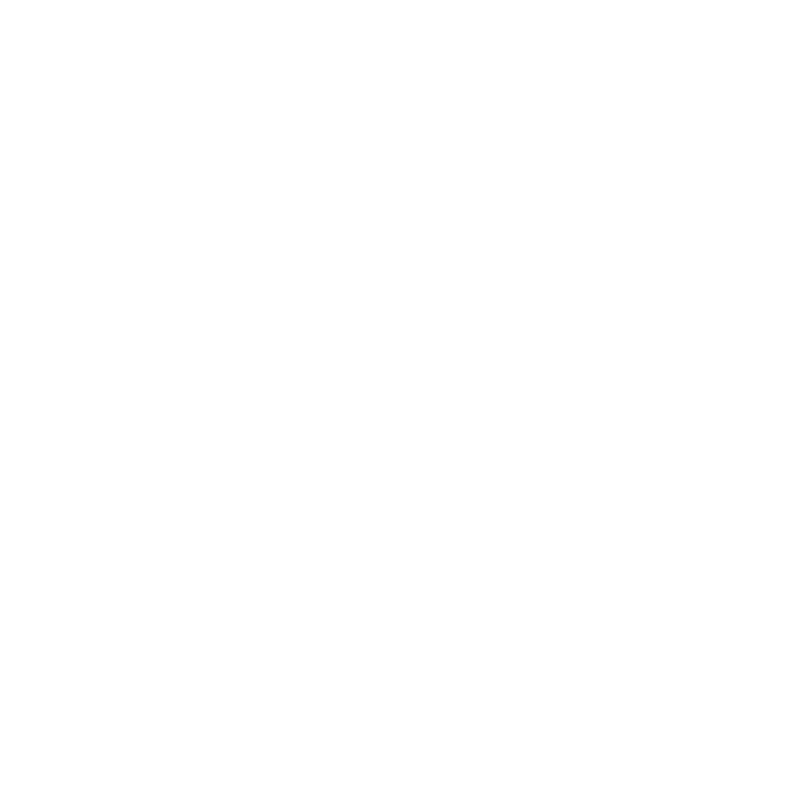

In [70]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
from itertools import combinations

lines = {
    1: "소요산 - 동두천 - 보산 - 동두천중앙 - 지행 - 덕정 - 덕계 - 양주 - 녹양 - 가능 - 의정부 - 회룡 - 망월사 - 도봉산 - 도봉 - 방학 - 창동 - 녹천 - 월계 - 성북 - 석계 - 신이문 - 외대앞 - 회기 - 청량리 - 제기동 - 신설동 - 동묘앞 - 동대문 - 종로5가 - 종로3가 - 종각 - 시청 - 서울역 - 남영 - 용산 - 노량진 - 대방 - 신길 - 영등포 - 신도림 - 구로 - 구일 - 개봉 - 오류동 - 온수 - 역곡 - 소사 - 부천 - 중동 - 송내 - 부개 - 부평 - 백운 - 동암 - 간석 - 주안 - 도화 - 제물포 - 도원 - 동인천 - 인천 - 광명 - 가산디지털단지 - 독산 - 금천구청 - 석수 - 관악 - 안양 - 명학 - 금정 - 군포 - 당정 - 의왕 - 성균관대 - 화서 - 수원 - 세류 - 병점 - 세마 - 오산대 - 오산 - 진위 - 송탄 - 서정리 - 지제 - 평택 - 성환 - 직산 - 두정 - 천안 - 봉명 - 쌍용 - 아산 - 배방 - 온양온천 - 신창 - 서동탄",
    2: "시청 - 을지로입구 - 을지로3가 - 을지로4가 - 동대문역사문화공원 - 신당 - 상왕십리 - 왕십리 - 한양대 - 뚝섬 - 성수 - 건대입구 - 구의 - 강변 - 잠실나루 - 잠실 - 신천 - 종합운동장 - 삼성 - 선릉 - 역삼 - 강남 - 교대 - 서초 - 방배 - 사당 - 낙성대 - 서울대입구 - 봉천 - 신림 - 신대방 - 구로디지털단지 - 대림 - 신도림 - 문래 - 영등포구청 - 당산 - 합정 - 홍대입구 - 신촌 - 이대 - 아현 - 충정로 - 시청",
    3: "대화 - 주엽 - 정발산 - 마두 - 백석 - 대곡 - 화정 - 원당 - 삼송 - 지축 - 구파발 - 연신내 - 불광 - 녹번 - 홍제 - 무악재 - 독립문 - 경복궁 - 안국 - 종로3가 - 을지로3가 - 충무로 - 동대입구 - 약수 - 금호 - 옥수 - 압구정 - 신사 - 잠원 - 고속터미널 - 교대 - 남부터미널 - 양재 - 매봉 - 도곡 - 대치 - 학여울 - 대청 - 일원 - 수서 - 가락시장 - 경찰병원 - 오금",
    4: "진접 - 오남 - 별내별가람 - 당고개 - 상계 - 노원 - 창동 - 쌍문 - 수유 - 미아 - 미아삼거리 - 길음 - 성신여대입구 - 한성대입구 - 혜화 - 동대문 - 동대문역사문화공원 - 충무로 - 명동 - 회현 - 서울역 - 숙대입구 - 삼각지 - 신용산 - 이촌 - 동작 - 이수 - 사당 - 남태령 - 선바위 - 경마공원 - 대공원 - 과천 - 정부과천청사 - 인덕원 - 평촌 - 범계 - 금정 - 산본 - 수리산 - 대야미 - 반월 - 상록수 - 한대앞 - 중앙 - 고잔 - 공단 - 안산 - 신길온천 - 정왕 - 오이도",
    5: "방화 - 개화산 - 김포공항 - 송정 - 마곡 - 발산 - 우장산 - 화곡 - 까치산 - 신정 - 목동 - 오목교 - 양평 - 영등포구청 - 영등포시장 - 신길 - 여의도 - 여의나루 - 마포 - 공덕 - 애오개 - 충정로 - 서대문 - 광화문 - 종로3가 - 을지로4가 - 동대문역사문화공원 - 청구 - 신금호 - 행당 - 왕십리 - 마장 - 답십리 - 장한평 - 군자 - 아차산 - 광나루 - 천호 - 강동 - 길동 - 굽은다리 - 명일 - 고덕 - 상일동 - 둔촌동 - 올림픽공원 - 방이 - 오금 - 개롱 - 거여 - 마천"
}

station_nodes = {}

# 1. 서브그래프 생성: 환승역 노드·간선만
G_t = nx.Graph()

# 2. 각 호선별 인덱스와 환승역 리스트 수집
line_transfer_idx = defaultdict(list)
for line, station_str in lines.items():
    stations = [s.strip() for s in station_str.split('-')]
    for idx, st in enumerate(stations):
        if st in station_nodes and len(station_nodes[st]) > 1:
            line_transfer_idx[line].append((idx, st))

# 3. 인접 환승역 사이 간선 추가 (라인 내 축소)
for line, items in line_transfer_idx.items():
    items.sort(key=lambda x: x[0])
    for (i1, s1), (i2, s2) in zip(items, items[1:]):
        n = i2 - i1 - 1
        weight = 2 * (n + 1)
        u = f"({line},{s1})"
        v = f"({line},{s2})"
        G_t.add_node(u);
        G_t.add_node(v)
        G_t.add_edge(u, v, weight=weight)

# 4. 환승역 간 간선 추가 (라인 간 연결, weight=2)
for station, nodes in station_nodes.items():
    transfer_nodes = [n for n in nodes if n in G_t.nodes()]
    # 각 노선의 시작역을 환승역으로 포함하도록 transfer_nodes 확장
    for line, station_str in lines.items():
        first_station = station_str.split('-')[0].strip()
        transfer_nodes.append(f"({line},{s1})")
    transfer_nodes = list(set(transfer_nodes))
    if len(transfer_nodes) > 1:
        for u, v in combinations(transfer_nodes, 2):
            G_t.add_edge(u, v, weight=2)

# 5. 시각화
pos = nx.kamada_kawai_layout(G_t)
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G_t, pos, node_color='gold', node_size=80)
nx.draw_networkx_edges(G_t, pos, edge_color='black')
nx.draw_networkx_labels(G_t, pos, labels={n: n for n in G_t.nodes()}, font_family='Malgun Gothic', font_size=10)
edge_labels = nx.get_edge_attributes(G_t, 'weight')
nx.draw_networkx_edge_labels(G_t, pos, edge_labels, font_family='Malgun Gothic', font_size=8)
plt.axis('off');
plt.tight_layout();
plt.show()

defaultdict(<class 'list'>, {'소요산': [1], '동두천': [1], '보산': [1], '동두천중앙': [1], '지행': [1], '덕정': [1], '덕계': [1], '양주': [1], '녹양': [1], '가능': [1], '의정부': [1], '회룡': [1], '망월사': [1], '도봉산': [1], '도봉': [1], '방학': [1], '창동': [1, 4], '녹천': [1], '월계': [1], '성북': [1], '석계': [1], '신이문': [1], '외대앞': [1], '회기': [1], '청량리': [1], '제기동': [1], '신설동': [1], '동묘앞': [1], '동대문': [1, 4], '종로5가': [1], '종로3가': [1, 3, 5], '종각': [1], '시청': [1, 2, 2], '서울역': [1, 4], '남영': [1], '용산': [1], '노량진': [1], '대방': [1], '신길': [1, 5], '영등포': [1], '신도림': [1, 2], '구로': [1], '구일': [1], '개봉': [1], '오류동': [1], '온수': [1], '역곡': [1], '소사': [1], '부천': [1], '중동': [1], '송내': [1], '부개': [1], '부평': [1], '백운': [1], '동암': [1], '간석': [1], '주안': [1], '도화': [1], '제물포': [1], '도원': [1], '동인천': [1], '인천': [1], '광명': [1], '가산디지털단지': [1], '독산': [1], '금천구청': [1], '석수': [1], '관악': [1], '안양': [1], '명학': [1], '금정': [1, 4], '군포': [1], '당정': [1], '의왕': [1], '성균관대': [1], '화서': [1], '수원': [1], '세류': [1], '병점': [1], '세마': [1], '오산대': [1], '오산': [1], '진위

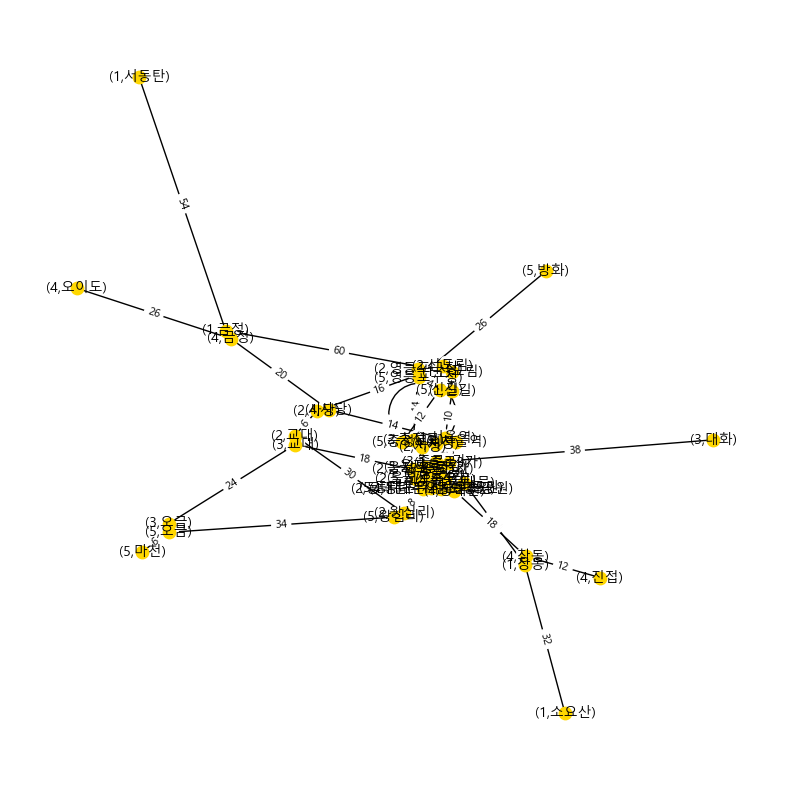

In [72]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
from itertools import combinations

# lines, station_nodes 는 기존 data.py 에서 정의한 것을 그대로 사용
plt.rcParams['font.family'] = 'Malgun Gothic'

lines = {
    1: "소요산 - 동두천 - 보산 - 동두천중앙 - 지행 - 덕정 - 덕계 - 양주 - 녹양 - 가능 - 의정부 - 회룡 - 망월사 - 도봉산 - 도봉 - 방학 - 창동 - 녹천 - 월계 - 성북 - 석계 - 신이문 - 외대앞 - 회기 - 청량리 - 제기동 - 신설동 - 동묘앞 - 동대문 - 종로5가 - 종로3가 - 종각 - 시청 - 서울역 - 남영 - 용산 - 노량진 - 대방 - 신길 - 영등포 - 신도림 - 구로 - 구일 - 개봉 - 오류동 - 온수 - 역곡 - 소사 - 부천 - 중동 - 송내 - 부개 - 부평 - 백운 - 동암 - 간석 - 주안 - 도화 - 제물포 - 도원 - 동인천 - 인천 - 광명 - 가산디지털단지 - 독산 - 금천구청 - 석수 - 관악 - 안양 - 명학 - 금정 - 군포 - 당정 - 의왕 - 성균관대 - 화서 - 수원 - 세류 - 병점 - 세마 - 오산대 - 오산 - 진위 - 송탄 - 서정리 - 지제 - 평택 - 성환 - 직산 - 두정 - 천안 - 봉명 - 쌍용 - 아산 - 배방 - 온양온천 - 신창 - 서동탄",
    2: "시청 - 을지로입구 - 을지로3가 - 을지로4가 - 동대문역사문화공원 - 신당 - 상왕십리 - 왕십리 - 한양대 - 뚝섬 - 성수 - 건대입구 - 구의 - 강변 - 잠실나루 - 잠실 - 신천 - 종합운동장 - 삼성 - 선릉 - 역삼 - 강남 - 교대 - 서초 - 방배 - 사당 - 낙성대 - 서울대입구 - 봉천 - 신림 - 신대방 - 구로디지털단지 - 대림 - 신도림 - 문래 - 영등포구청 - 당산 - 합정 - 홍대입구 - 신촌 - 이대 - 아현 - 충정로 - 시청",
    3: "대화 - 주엽 - 정발산 - 마두 - 백석 - 대곡 - 화정 - 원당 - 삼송 - 지축 - 구파발 - 연신내 - 불광 - 녹번 - 홍제 - 무악재 - 독립문 - 경복궁 - 안국 - 종로3가 - 을지로3가 - 충무로 - 동대입구 - 약수 - 금호 - 옥수 - 압구정 - 신사 - 잠원 - 고속터미널 - 교대 - 남부터미널 - 양재 - 매봉 - 도곡 - 대치 - 학여울 - 대청 - 일원 - 수서 - 가락시장 - 경찰병원 - 오금",
    4: "진접 - 오남 - 별내별가람 - 당고개 - 상계 - 노원 - 창동 - 쌍문 - 수유 - 미아 - 미아삼거리 - 길음 - 성신여대입구 - 한성대입구 - 혜화 - 동대문 - 동대문역사문화공원 - 충무로 - 명동 - 회현 - 서울역 - 숙대입구 - 삼각지 - 신용산 - 이촌 - 동작 - 이수 - 사당 - 남태령 - 선바위 - 경마공원 - 대공원 - 과천 - 정부과천청사 - 인덕원 - 평촌 - 범계 - 금정 - 산본 - 수리산 - 대야미 - 반월 - 상록수 - 한대앞 - 중앙 - 고잔 - 공단 - 안산 - 신길온천 - 정왕 - 오이도",
    5: "방화 - 개화산 - 김포공항 - 송정 - 마곡 - 발산 - 우장산 - 화곡 - 까치산 - 신정 - 목동 - 오목교 - 양평 - 영등포구청 - 영등포시장 - 신길 - 여의도 - 여의나루 - 마포 - 공덕 - 애오개 - 충정로 - 서대문 - 광화문 - 종로3가 - 을지로4가 - 동대문역사문화공원 - 청구 - 신금호 - 행당 - 왕십리 - 마장 - 답십리 - 장한평 - 군자 - 아차산 - 광나루 - 천호 - 강동 - 길동 - 굽은다리 - 명일 - 고덕 - 상일동 - 둔촌동 - 올림픽공원 - 방이 - 오금 - 개롱 - 거여 - 마천"
}

# 0. station_nodes 초기화: 역명 → [호선,...]
station_nodes = defaultdict(list)
for line, station_str in lines.items():
    for st in station_str.split('-'):
        station_nodes[st.strip()].append(line)

print(station_nodes)

# 1. 서브그래프 생성: 환승역 노드·간선만
G_t = nx.Graph()

# 2. 각 호선별 인덱스와 환승역 리스트 수집
line_transfer_idx = defaultdict(list)
for line, station_str in lines.items():
    stations = [s.strip() for s in station_str.split('-')]
    for idx, st in enumerate(stations):
        if st in station_nodes and len(station_nodes[st]) > 1:
            line_transfer_idx[line].append((idx, st))
        if idx==0 or idx==len(stations)-1:
            line_transfer_idx[line].append((idx, st))

for line, items in line_transfer_idx.items():
    line_transfer_idx[line] = list(dict.fromkeys(items))
print(line_transfer_idx)

# 3. 인접 환승역 사이 간선 추가 (라인 내 축소)
for line, items in line_transfer_idx.items():
    items.sort(key=lambda x: x[0])
    for (i1, s1), (i2, s2) in zip(items, items[1:]):
        n = i2 - i1 - 1
        weight = 2 * (n + 1)
        u = f"({line},{s1})"
        v = f"({line},{s2})"
        G_t.add_node(u);
        G_t.add_node(v)
        G_t.add_edge(u, v, weight=weight)

# 4. 환승역 간 간선 추가 (라인 간 연결, weight=2)
for station, lines in station_nodes.items():
    if len(lines)>1:
        transfer_nodes = [
            f"({line},{station})"
            for line in lines
            if f"({line},{station})" in G_t.nodes
        ]
        for u, v in combinations(transfer_nodes, 2):
            G_t.add_edge(u, v, weight=2)

# for station, nodes in station_nodes.items():
#     transfer_nodes = [n for n in nodes if n in G_t.nodes()]
#     if len(transfer_nodes) > 1:
#         for u, v in combinations(transfer_nodes, 2):
#             G_t.add_edge(u, v, weight=2)

# print([n for n in nodes if n in G_t.nodes()])

# 5. 시각화
pos = nx.kamada_kawai_layout(G_t)
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G_t, pos, node_color='gold', node_size=80)
nx.draw_networkx_edges(G_t, pos, edge_color='black')
nx.draw_networkx_labels(G_t, pos, labels={n: n for n in G_t.nodes()}, font_family='Malgun Gothic', font_size=10)
edge_labels = nx.get_edge_attributes(G_t, 'weight')
nx.draw_networkx_edge_labels(G_t, pos, edge_labels, font_family='Malgun Gothic', font_size=8)
plt.axis('off');
plt.tight_layout();
plt.show()